In [11]:
import numpy as np

bspline3 = np.array([
    [-1, 3, -3, 1],
    [3, -6, 3, 0],
    [-3, 0, 3, 0],
    [1, 4, 1, 0]]) / 6

jerk_matrix = np.array([[6,0,0,0]])

points = np.array([[0,0],[1,0],[1,1],[0,1]])
jerk = jerk_matrix@bspline3@points
effort = np.linalg.norm(jerk)**2
effort

4.0

In [31]:
from scipy.optimize import minimize

def calculate_effort(points):
    jerk_matrix = np.array([[6,0,0,0]])
    jerk = jerk_matrix@bspline3@points
    return np.linalg.norm(jerk)**2



# Objective function: sum of squares of the equations
def objective(control_points):
    points = np.array(control_points).reshape((4,-1))
    effort = calculate_effort(points)
    # Your equations here, corrected to return the sum of squares
    return effort
# Bounds for mu, sigma, and tf
bounds = ((3, 8), (5, 7), (0, 10), (0, 10),(0, 10), (0, 10),(0, 10), (0, 10))

# Initial guess
# initial_guess = [1, 0, 1]
initial_guess = [0,0,0,1,1,1,1,0] #x1y1x2y2x3y3x4y4
# Minimization with SLSQP
result = minimize(objective, initial_guess, method='SLSQP', bounds=bounds)
print(result)
# Check the result
if result.success:
    print(f"Found solution: result.x = {result.x}")
else:
    print("Failed to find a solution:", result.message)

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: 2.7433020818270714e-14
       x: [ 3.006e+00  5.000e+00  1.201e+00  2.117e+00  8.964e-01
            8.588e-01  2.091e+00  1.226e+00]
     nit: 3
     jac: [-2.256e-07 -2.129e-07  8.555e-07  8.176e-07 -5.873e-07
           -5.494e-07  2.554e-07  2.427e-07]
    nfev: 30
    njev: 3
Found solution: result.x = [3.00610538 5.         1.20123331 2.11682645 0.89636119 0.85881311
 2.09148912 1.2259601 ]


[[3.00610538 5.        ]
 [1.20123331 2.11682645]
 [0.89636119 0.85881311]
 [2.09148912 1.2259601 ]]


2.7433020818270714e-14

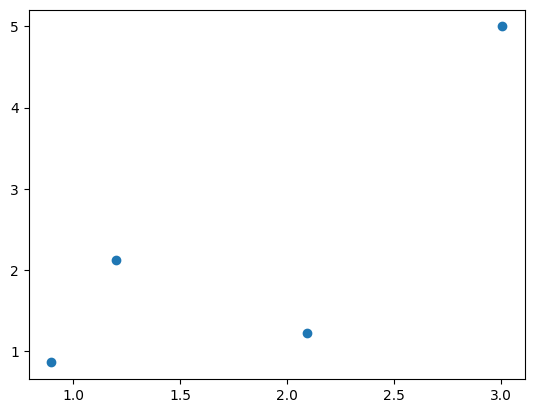

In [32]:
points = result.x.reshape(4,-1)
print(points)
import matplotlib.pyplot as plt
#plot the points which are currently of shape (4,2)
plt.scatter(points[:,0], points[:,1])
calculate_effort(points)

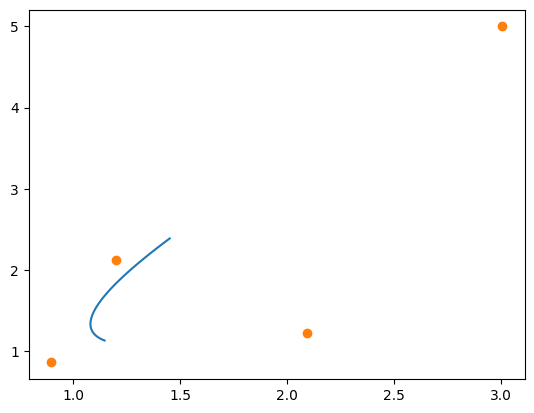